In [1]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
from matplotlib_venn import venn2

pd.set_option('display.max_rows', 500)

In [2]:
mapp = pd.read_csv('../16p12.2_rnaseq_analysis/data/gene_names_mapping_new.tsv', sep='\t')
mapp = mapp.set_index('ensembl')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pql = pd.read_csv('pqlseq_by_replicate.tsv', sep='\t')


pql_keep = list(pql.index)
pql = pql.sort_values('pvalue')
pql['FDR'] = multipletests(pql.pvalue, method='fdr_bh')[1]
pql = pql[pql.FDR < 0.05]
pql['gene'] = mapp.loc[pql.index, 'Description']
pql['ensembl'] = pql.index.to_series()

In [4]:
pql.to_csv('pqlseq_by_replicate_FDR.tsv', sep='\t', index=False)

In [5]:
edger = pd.read_csv('../16p12.2_rnaseq_analysis/differential_expression_analysis/output/edgr_exclude_one/intersect.tsv',
                   sep='\t')

edger_keep = pd.read_csv('../16p12.2_rnaseq_analysis/differential_expression_analysis/output/edgr_exclude_one/keep.intersect.txt',
                        header=None)
edger_keep = edger_keep[0].to_list()

In [6]:
keep_intersect = list(set(edger_keep) & set(pql_keep))

In [7]:
pql = pql[pql.ensembl.isin(keep_intersect)]
edger = edger[edger.ensembl.isin(keep_intersect)]

In [8]:
edger.shape

(1636, 7)

In [9]:
pql.shape

(1061, 10)

In [10]:
pql[pql.ensembl.isin(edger.ensembl.to_list())].shape

(883, 10)

In [11]:
pql[~(pql.ensembl.isin(edger.ensembl.to_list()))].shape

(178, 10)

In [12]:
edger[~(edger.ensembl.isin(pql.ensembl.to_list()))].shape

(753, 7)

# figure

In [16]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'

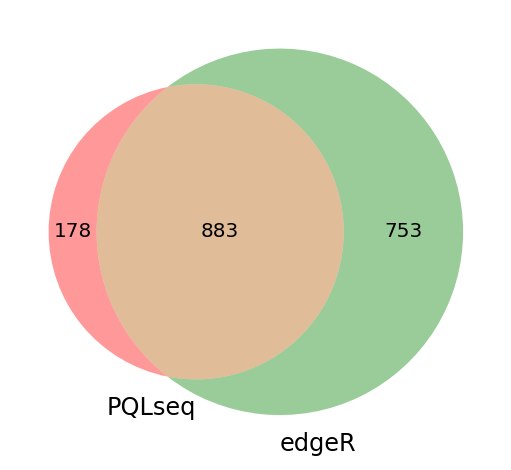

In [17]:
v = venn2((178, 753, 883), ('PQLseq', 'edgeR'))

plt.savefig('venn.pdf', dpi=300)